This is an attempt to code a learning algorithm

1. Gather details on bipartite network and connectivity information in the form of an adjacency matrix (1 representing postive links, -1 represent negative links, 0 representing no existing links.
2. Create PCA of monomers with various descriptors. Identify clustering.
3. Provide synthetic data into the adjacency matrix, given the clustering of the monomer model (use intrinsic monomer information in PCA to guess which outcome is more likely)
4. Identify similarity between the catalyst, using ONLY experimental and monomer information (no information from DFT is provided to do the clustering)
5. Find the relevant QM descriptors we can use to describe the chemical space of the catalyst that fits with the experimental chemical space in our cluster.
6. Rationalize the QM descriptors. Then, we use it to introduce communities within the bipartite network, and thus formulate a recommendation.
7. Generate hypothetical links, with prediction percentage for each outcome. Test in experiment. Tada

In [9]:
# Obtain descriptor value from monomer dataset, create PCA to visualize general chemical space


In [10]:
import pandas as pd
import os
from morfeus import SASA, read_geometry, read_xyz, XTB, Sterimol, Dispersion
from rdkit import Chem
from rdkit.Chem import Descriptors, MolFromXYZFile
import subprocess 

In [11]:
dir(Descriptors)

['AUTOCORR2D_1',
 'AUTOCORR2D_10',
 'AUTOCORR2D_100',
 'AUTOCORR2D_101',
 'AUTOCORR2D_102',
 'AUTOCORR2D_103',
 'AUTOCORR2D_104',
 'AUTOCORR2D_105',
 'AUTOCORR2D_106',
 'AUTOCORR2D_107',
 'AUTOCORR2D_108',
 'AUTOCORR2D_109',
 'AUTOCORR2D_11',
 'AUTOCORR2D_110',
 'AUTOCORR2D_111',
 'AUTOCORR2D_112',
 'AUTOCORR2D_113',
 'AUTOCORR2D_114',
 'AUTOCORR2D_115',
 'AUTOCORR2D_116',
 'AUTOCORR2D_117',
 'AUTOCORR2D_118',
 'AUTOCORR2D_119',
 'AUTOCORR2D_12',
 'AUTOCORR2D_120',
 'AUTOCORR2D_121',
 'AUTOCORR2D_122',
 'AUTOCORR2D_123',
 'AUTOCORR2D_124',
 'AUTOCORR2D_125',
 'AUTOCORR2D_126',
 'AUTOCORR2D_127',
 'AUTOCORR2D_128',
 'AUTOCORR2D_129',
 'AUTOCORR2D_13',
 'AUTOCORR2D_130',
 'AUTOCORR2D_131',
 'AUTOCORR2D_132',
 'AUTOCORR2D_133',
 'AUTOCORR2D_134',
 'AUTOCORR2D_135',
 'AUTOCORR2D_136',
 'AUTOCORR2D_137',
 'AUTOCORR2D_138',
 'AUTOCORR2D_139',
 'AUTOCORR2D_14',
 'AUTOCORR2D_140',
 'AUTOCORR2D_141',
 'AUTOCORR2D_142',
 'AUTOCORR2D_143',
 'AUTOCORR2D_144',
 'AUTOCORR2D_145',
 'AUTOCORR2D_146',


In [12]:
def xyz_to_sdf(xyz_file, sdf_file):
    # Convert .xyz to .sdf using Open Babel
    subprocess.run(['obabel', xyz_file, '-O', sdf_file])

def read_molecule_from_sdf(sdf_file):
    # Read molecule from .sdf file using RDKit
    supplier = Chem.SDMolSupplier(sdf_file)
    mol = next(supplier)
    return mol
    
def extract_descriptors(mol):
    # Extract descriptors using RDKit

    descriptors = {
        'LogP': Descriptors.MolLogP(mol),
        'Num Rotatable Bonds': Descriptors.NumRotatableBonds(mol),
        'Ring Count': Descriptors.RingCount(mol),
        'Num H Donors': Descriptors.NumHDonors(mol),
        'Num H Acceptors': Descriptors.NumHAcceptors(mol),
        'Num Heteroatoms' : Descriptors.NumHeteroatoms(mol),
        'Num Aliphatic Rings': Descriptors.NumAliphaticRings(mol),
        'Num Aliphatic Heterocycles': Descriptors.NumAliphaticHeterocycles(mol),
        'Num Aliphatic Carbocycles': Descriptors.NumAliphaticCarbocycles(mol),
        'Num NH OH Count': Descriptors.NHOHCount(mol),
        'Num NO Count': Descriptors.NOCount(mol),
        'TPSA': Descriptors.TPSA(mol),
        # Add more descriptors as needed
    }
    return logp, 

# Function to process each .xyz file
def process_xyz_file(xyz_file):
    sdf_file = xyz_file.replace('.xyz', '.sdf')
    xyz_to_sdf(xyz_file, sdf_file)
    mol = read_molecule_from_sdf(sdf_file)




In [13]:
# Define the directory containing the .xyz files
directory = 'monomers'

# List all files in the directory
file_list = os.listdir(directory)

# Filter out only .xyz files
xyz_files = [f for f in file_list if f.endswith('.xyz')]

# Initialize a list to store the monomer descriptors
surface_area = []
p_int = []
volume = []
sasa_area = [] #solvent accessible surface area
sasa_volume = [] #solvent accessible volume
L_value = []
B_1_value = []
B_5_value = []
logp = []
num_rotate_bond = []


# Loop through each .xyz file and apply the read_xyz function
for file_name in xyz_files:
    file_path = os.path.join(directory, file_name)
    try:
        # Read the .xyz file and gather descriptors
        elements, coordinates = read_xyz(file_path)
        disp = Dispersion(elements, coordinates)
        surface_area.append(disp.area)
        p_int.append(disp.p_int)
        volume.append(disp.volume)     
        sasa = SASA(elements, coordinates)
        sasa_area.append(sasa.area)
        sasa_volume.append(sasa.volume)
        sterimol = Sterimol(elements, coordinates, 1, 5)
        L_value.append(sterimol.L_value)
        B_1_value.append(sterimol.B_1_value)
        B_5_value.append(sterimol.B_5_value)
        
    except Exception as e:
        print(f"Error reading {file_name}: {e}")

In [14]:
num_rotate_bond

[]

In [15]:
# Create a dictionary from the lists
data = {
    'Surface Area': surface_area,
    'P Int': p_int,
    'Volume': volume,
    'SASA Area': sasa_area,
    'SASA Volume': sasa_volume,
    'L_value': L_value,
    'B_1_value' : B_1_value,
    'B_5_value' : B_5_value,
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

df.to_csv('morpheus-descriptors.csv', index=False)

# Display the DataFrame
df.head()

,Surface Area,P Int,Volume,SASA Area,SASA Volume,L_value,B_1_value,B_5_value
0,194.413248,14.656332,167.157415,310.339784,427.613401,3.731911,1.833489,5.821534
1,139.035299,13.838782,115.099306,240.177486,314.705092,3.723621,1.748923,4.919418
2,172.337816,15.164360,157.472200,275.697776,387.883913,5.719985,2.237325,3.916396
3,154.907401,14.931572,137.435249,253.489423,346.396987,4.499460,1.791346,4.635271
4,163.718150,14.672242,148.083219,260.128925,359.979750,4.509908,1.854867,4.653714


In [16]:
# List of descriptor lists
descriptor_lists = [
    surface_area,
    p_int,
    volume,
    sasa_area,
    sasa_volume,
    L_value,
    B_1_value,
    B_5_value
]

# Check if all lists have the same length
type_list = [type(lst) for lst in descriptor_lists]
print(type_list)
# lengths = [len(lst) for list(lst) in descriptor_lists]
# if len(set(lengths)) == 1:
#     print("All lists have the same length.")
# else:
#     print("Lists have different lengths.")
#     print("Lengths of the lists:", lengths)



[<class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>]


Import dataset for monomers, generate Pearson correlation table and generate PCA table

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the data from the .csv file
file_path = 'monomer_descriptors.csv'
df = pd.read_csv(file_path)

# Assume the first column is the name of the monomer
monomer_names = df.iloc[:, 0]

# The rest of the columns are descriptor values
X = df.iloc[:, 1:]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Choosing 2 components for a 2D PCA map
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df = pd.concat([monomer_names, pca_df], axis=1)

print(pca_df.columns)

Index(['Monomer', 'Principal Component 1', 'Principal Component 2'], dtype='object')


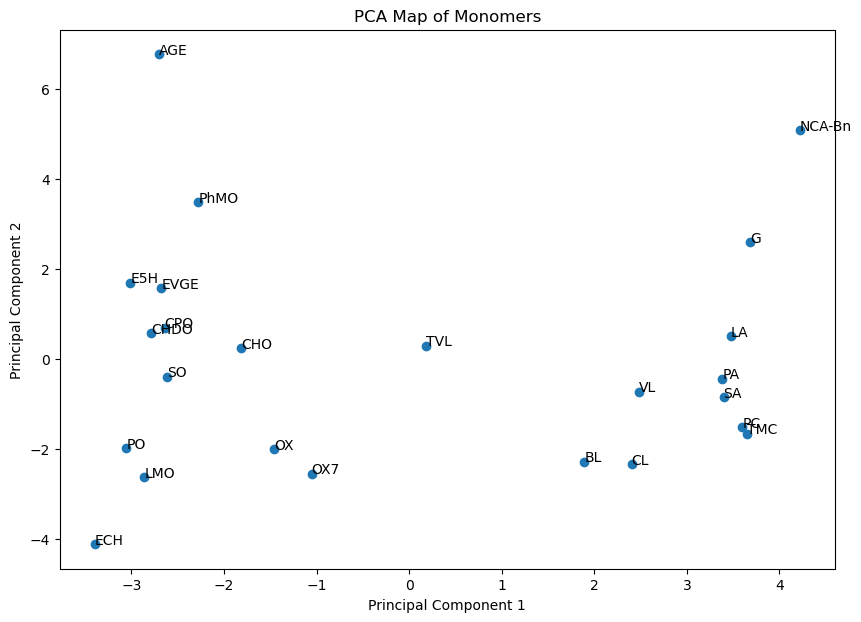

In [18]:
# Plot the PCA map
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])

# Annotate points with monomer names
for i, name in enumerate(monomer_names):
    plt.annotate(name, (pca_df['Principal Component 1'][i], pca_df['Principal Component 2'][i]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Map of Monomers')
plt.grid(False)

# Show the plot
plt.show()


In [19]:
def rank_distances(pca_df, selected_monomer):
    # Get the coordinates of the selected monomer
    selected_coords = pca_df[pca_df['Monomer'] == selected_monomer][['Principal Component 1', 'Principal Component 2']].values[0]
    
    # Calculate Euclidean distances from the selected monomer to all other monomers
    pca_df['Distance'] = pca_df.apply(lambda row: np.linalg.norm([row['Principal Component 1'] - selected_coords[0], row['Principal Component 2'] - selected_coords[1]]), axis=1)
    
    # Sort monomers by distance
    ranked_df = pca_df.sort_values(by='Distance')
    
    return ranked_df[['Monomer', 'Distance']]


# Analyze PCA Plot

Explained Variance Ratio: [0.28878183 0.22759413]


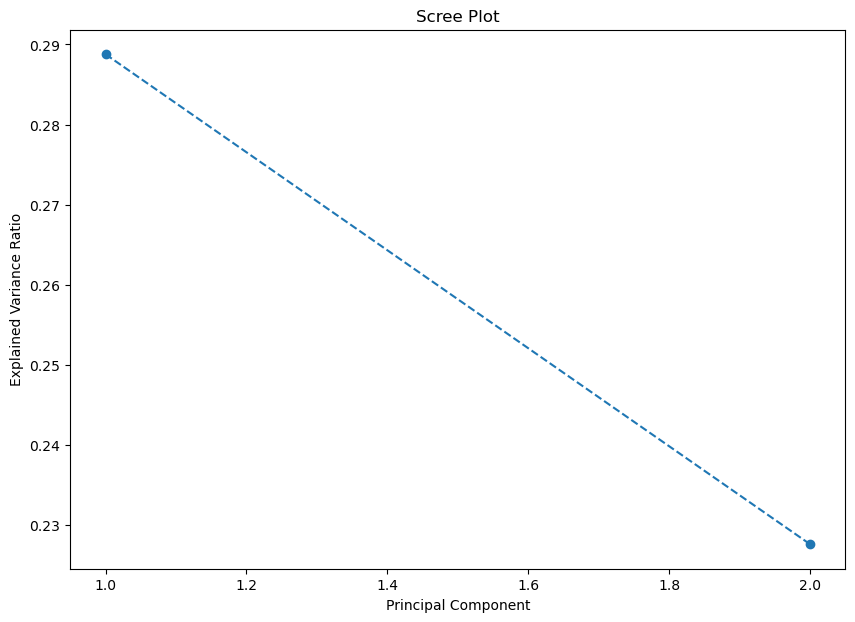

In [20]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")

# Generate the scree plot
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

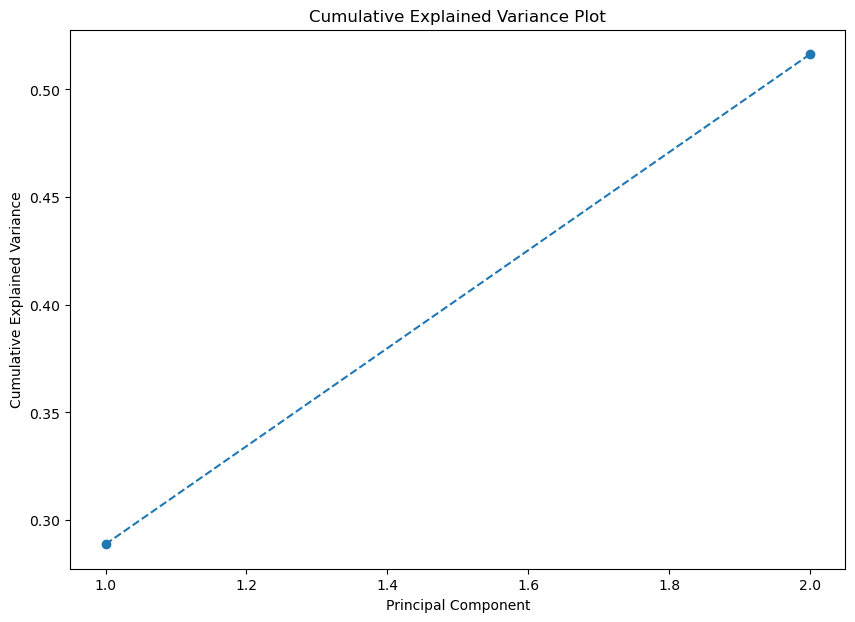

In [21]:
# Plot cumulative explained variance
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()


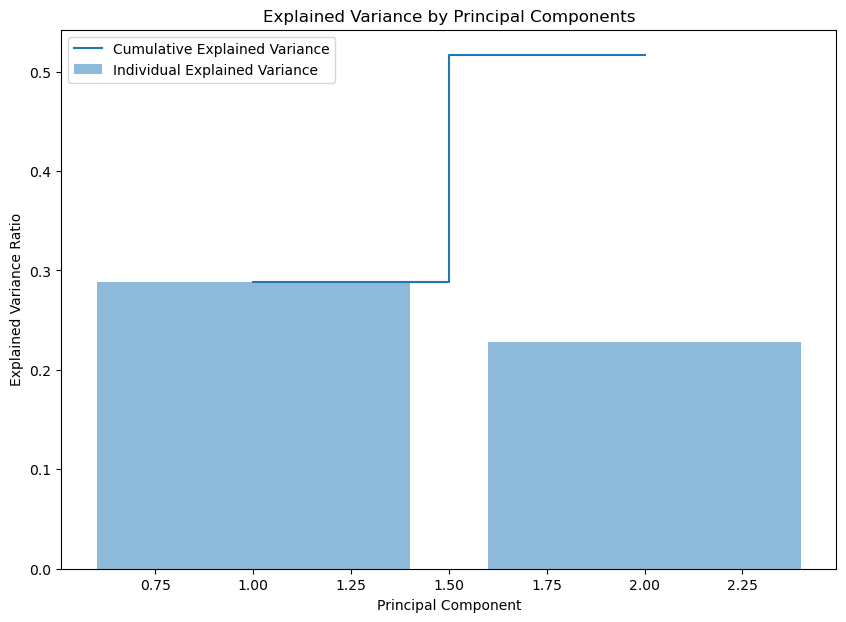

In [22]:
plt.figure(figsize=(10, 7))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()


In [23]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)
print(loadings)


                                PC1       PC2
Number of oxygen atoms     0.274834  0.119214
Alkene                    -0.178082  0.128494
No. of N atoms             0.108742  0.166616
No. of S atoms             0.004657  0.009534
No. of C=O                 0.325562  0.045494
No. of Halogen            -0.087504 -0.134789
No. of rings              -0.029125  0.135760
No. of aromatics           0.071534  0.168471
Ring size that will break  0.259824 -0.046671
Epoxide                   -0.308593  0.077367
Ester                      0.177800  0.008964
Carbonate                  0.135183 -0.075210
Anhydride                  0.171298  0.075243
NBO for site of attack     0.340613 -0.033150
Peripheral NBO (Average)  -0.323591  0.076639
Mulliken                   0.319400 -0.066942
Peripheral Mullken        -0.300883  0.115767
Surface area               0.034167  0.376281
P_int                     -0.017899  0.335196
Surface volume             0.031399  0.378473
SASA Area                  0.02355

C:\Users\George\AppData\Local\Temp\ipykernel_24032\3858146394.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(0, 0, loadings['PC1'][i]*max(pca_df['Principal Component 1']), loadings['PC2'][i]*max(pca_df['Principal Component 2']), color='r', alpha=0.5)
C:\Users\George\AppData\Local\Temp\ipykernel_24032\3858146394.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(loadings['PC1'][i]*max(pca_df['Principal Component 1'])*1.15, loadings['PC2'][i]*max(pca_df['Principal Component 2'])*1.15, var, color='g', ha='center', va='center')


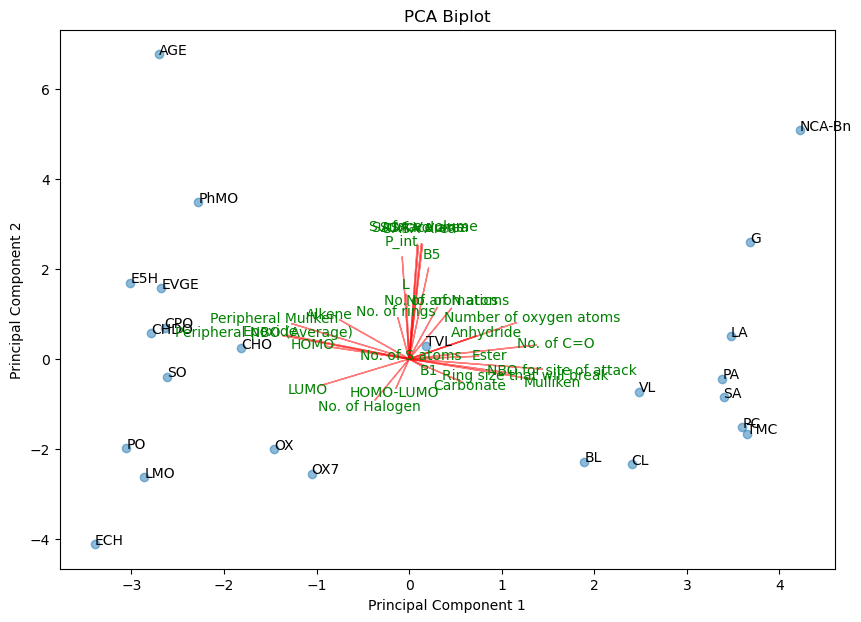

In [24]:
# Generate biplot to identify how strongly each characteristic influences a principal component

plt.figure(figsize=(10, 7))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.5)
for i, name in enumerate(monomer_names):
    plt.annotate(name, (pca_df['Principal Component 1'][i], pca_df['Principal Component 2'][i]))

# Add vectors
for i, var in enumerate(X.columns):
    plt.arrow(0, 0, loadings['PC1'][i]*max(pca_df['Principal Component 1']), loadings['PC2'][i]*max(pca_df['Principal Component 2']), color='r', alpha=0.5)
    plt.text(loadings['PC1'][i]*max(pca_df['Principal Component 1'])*1.15, loadings['PC2'][i]*max(pca_df['Principal Component 2'])*1.15, var, color='g', ha='center', va='center')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Biplot')
plt.grid(False)
plt.savefig('Monomer PCA Biplot.png')
plt.show()


In [25]:
# Generate Scree plot



In [26]:
# Import adjacency matrix from bipratite network
adj_matrix_orthogonality= pd.read_csv('adj_matrix_orthogonality.csv')
adj_matrix_red = pd.read_csv('adj_matrix_red.csv')
adj_matrix_ox = pd.read_csv('adj_matrix_ox.csv')

In [27]:
adj_matrix_ox

,Monomer,(phosfen)In(OPh),(phosfen)Y(OtBu),(salfan)Zr(OtBu)2,(salfan-H2)Al(OiPr)2,(salfan-H2)Ti(OiPr)2,(salfan-H2)Zr(OtBu)2,(salfen)Al(OiPr),(salfen)Ti(OiPr)2,(salfen)Y(OtBu),(salfen)Zr(OiPr)2,(thiolfan)Zr(OtBu)2,(thiolfan*)Al(OtBu),(thiolfan*)Ti(OiPr)2,(thiolfan*)Zr(OtBu)2
0,BL,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0
1,CHDO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,CHO,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,CL,0.0,0.0,1.0,0.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0
4,EVGE,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,LA,-1.0,1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,OX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,PC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
8,PO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,SO,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Iterate through each column, 

In [29]:
monomer_list = list(adj_matrix_orthogonality['Monomer'])

In [38]:
monomer_list #List of monomers which have been tested before

['BL', 'CHDO', 'CHO', 'CL', 'EVGE', 'LA', 'OX', 'PC', 'PO', 'SO', 'TMC', 'VL']

In [31]:
# Example: Rank all monomers in terms of its distance away from a selected monomer on the PCA map
selected_monomer = 'CL'
ranked_distances = rank_distances(pca_df, selected_monomer)
print(ranked_distances)
filtered_ranked_distances = ranked_distances[ranked_distances['Monomer'].isin(monomer_list)]  #Choose monomers that have been experimented before.

#Calculate number of monomers, included the selected one
num_monomers = len(filtered_ranked_distances)

# Create a weights column with values linearly decreasing from 1 to 0
filtered_ranked_distances['Weight'] = [1 - i / (num_monomers - 1) for i in range(num_monomers)]

# Remove top row to remove the selected monomer so we only have a dataframe of other monomers
filtered_ranked_distances = filtered_ranked_distances.drop(index=filtered_ranked_distances.index[0])

print(filtered_ranked_distances)
weight_sum = filtered_ranked_distances['Weight'].sum()

# Display the summation
print("Total Weight:", weight_sum)

   Monomer   Distance
4       CL   0.000000
3       BL   0.514688
22     TMC   1.423691
17      PC   1.453528
23      VL   1.617964
20      SA   1.792898
16      PA   2.145952
11      LA   3.043274
21     TVL   3.447662
14     OX7   3.461249
15      OX   3.878359
6      CHO   4.941804
10       G   5.099698
12     LMO   5.272441
19      SO   5.386890
18      PO   5.472048
7      CPO   5.888406
5     CHDO   5.949126
8      ECH   6.061778
9     EVGE   6.415273
0      E5H   6.753309
1     PhMO   7.476982
13  NCA-Bn   7.654702
2      AGE  10.450958
   Monomer  Distance    Weight
3       BL  0.514688  0.909091
22     TMC  1.423691  0.818182
17      PC  1.453528  0.727273
23      VL  1.617964  0.636364
11      LA  3.043274  0.545455
15      OX  3.878359  0.454545
6      CHO  4.941804  0.363636
19      SO  5.386890  0.272727
18      PO  5.472048  0.181818
5     CHDO  5.949126  0.090909
9     EVGE  6.415273  0.000000
Total Weight: 4.999999999999999


C:\Users\George\AppData\Local\Temp\ipykernel_24032\1916374753.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ranked_distances['Weight'] = [1 - i / (num_monomers - 1) for i in range(num_monomers)]


In [39]:
filtered_ranked_distances

,Monomer,Distance,Weight
17,PC,1.373299,0.909091
22,TMC,1.497374,0.818182
11,LA,1.584517,0.727273
4,CL,1.617964,0.636364
3,BL,1.661381,0.545455
15,OX,4.139494,0.454545
6,CHO,4.397309,0.363636
19,SO,5.108076,0.272727
5,CHDO,5.420132,0.181818
9,EVGE,5.645827,0.090909


In [32]:
# Identify adj matrix. Iterate through each column, for each metal complex,identify those that have links (+1/-1), and those that don't (0)
# Loop among each monomer that don't. For each of those monomers, generate a ranked distance dataframe. From that ranked distance dataframe,
# find the monomers that do have link, and multiply their weight with the type of link they have (weight X +1 or -1). Create a sum of those products
# and divide it by the summation of all weight values( 

In [33]:
updated_adj_matrix_orthogonality = adj_matrix_orthogonality.copy()
updated_adj_matrix_orthogonality.set_index('Monomer', inplace=True)

updated_adj_matrix_red = adj_matrix_red.copy()
updated_adj_matrix_red.set_index('Monomer', inplace=True)

updated_adj_matrix_ox = adj_matrix_ox.copy()
updated_adj_matrix_ox.set_index('Monomer', inplace=True)


updated_matrix_list = [updated_adj_matrix_orthogonality,updated_adj_matrix_red,updated_adj_matrix_ox] # List of matrix for those including orthgonality, reduced and oxizided system
adj_matrix_list = [adj_matrix_orthogonality,adj_matrix_red,adj_matrix_ox]

In [54]:
# From adjacency matrix, separate those that have links and no links

for updated_matrix,adj_matrix in zip(updated_matrix_list,adj_matrix_list):
    links = {}
    print("Adj matrix:",adj_matrix)
    for column in adj_matrix.columns[1:]:
        linked = adj_matrix[adj_matrix[column] != 0][['Monomer', column]]     # Each column represents a catalyst
        no_link = adj_matrix[adj_matrix[column] == 0]['Monomer']
        links[column] = {
            'linked': linked,
            'no_link': no_link
        }
    
    
    for complex_name, link_data in links.items():            # Loop 
        monomer_no_link_list = list(link_data['no_link'])     # Get list of monomers with no link with complex 
        monomer_link_list = list(link_data['linked']['Monomer']) # Get list of monomers that have link with complex
        link_type_list = list(link_data['linked'][complex_name]) # Get list of link type for monomers that have link with complex, link type is either + or -
    
        
        for monomer_no_link in monomer_no_link_list:         # Iterate through monomers that have no link with the catalyst to fill in synthetic weight
            ranked_distances = rank_distances(pca_df, monomer_no_link) # Rank distances away from the selected monomer (monomer_no_link)
            
            filtered_ranked_distances = ranked_distances[ranked_distances['Monomer'].isin(monomer_list)]  #Choose monomers that have been experimented before.
            
            # Calculate number of monomers, included the selected one
            num_monomers = len(filtered_ranked_distances)
        
            # Create a weights column with values linearly decreasing from 1 to 0
            filtered_ranked_distances['Weight'] = [1 - i / (num_monomers - 1) for i in range(num_monomers)]
            
            # Remove top row so we only have a dataframe of other monomers
            filtered_ranked_distances = filtered_ranked_distances.drop(index=filtered_ranked_distances.index[0])
            
            # print(filtered_ranked_distances)
            weight_sum = filtered_ranked_distances['Weight'].sum()
            
            # Display the summation
            # print("Total Weight:", weight_sum)

            print("Filtered_ranked_distance: ", filtered_ranked_distances)
            print("Link_data:", link_data['linked'])
            monomer_with_link_df = pd.merge(filtered_ranked_distances, link_data['linked'], on='Monomer')
            
    
            # Multiply the Weight by the Link type and sum the products
            # Far away from selected monomer  --> Lower magnitude (close to 0) --> less relevance/less likely for it to have similar link type
            # Close to seleted monomer --> Higher weight (close to 1) --> more likely to have similar link type
            monomer_with_link_df['Product'] = monomer_with_link_df['Weight'] * monomer_with_link_df[complex_name]
            
            # Sum the products
            total_sum = monomer_with_link_df['Product'].sum()
            # weight (0.129) * link_type (+1) + weight2 (0.432) * link_type2 (-1) + ..... = total_sum
            print(total_sum)
            print(weight_sum)
            # Display the sum of the products
            # print("Sum of the products:", total_sum)
            synthetic_link_weight = total_sum/weight_sum # Normalize back to typical weight values, between [-1,1]
    
    
            if updated_matrix.at[monomer_no_link, complex_name] == 0:
                updated_matrix.at[monomer_no_link, complex_name] = synthetic_link_weight   # Assign synthetic link weight to the monomer with no link 


updated_adj_matrix_orthogonality         

Adj matrix:    Monomer  (phosfen)In(OPh)  (phosfen)Y(OtBu)  (salfan)Zr(OtBu)2  \
0       BL               0.0               0.0                0.0   
1     CHDO               0.0               0.0                0.0   
2      CHO               0.0               0.0                0.0   
3       CL               0.0               0.0                1.0   
4     EVGE               0.0               0.0                0.0   
5       LA              -1.0              -1.0                1.0   
6       OX               0.0               0.0                0.0   
7       PC               0.0               0.0                0.0   
8       PO               0.0               0.0                0.0   
9       SO               0.0               0.0                0.0   
10     TMC               0.0               0.0               -1.0   
11      VL               0.0               0.0                0.0   

    (salfan-H2)Al(OiPr)2  (salfan-H2)Ti(OiPr)2  (salfan-H2)Zr(OtBu)2  \
0                 

C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ranked_distances['Weight'] = [1 - i / (num_monomers - 1) for i in range(num_monomers)]
C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ranked_distances['Weight'] = [1 - i / (num_monomers - 1) for i in range(num_monomers)]
C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarnin

0.5454545454545455
4.999999999999999
Filtered_ranked_distance:     Monomer  Distance    Weight
19      SO  0.977231  0.909091
9     EVGE  1.011136  0.818182
6      CHO  1.027758  0.727273
18      PO  2.561721  0.636364
15      OX  2.891210  0.545455
23      VL  5.420132  0.454545
3       BL  5.476868  0.363636
4       CL  5.949126  0.272727
11      LA  6.259429  0.181818
17      PC  6.717573  0.090909
22     TMC  6.810055  0.000000
Link_data:    Monomer  (salfan-H2)Al(OiPr)2
0       BL                  -1.0
2      CHO                   1.0
4     EVGE                  -1.0
5       LA                   1.0
9       SO                   1.0
10     TMC                  -1.0
11      VL                   1.0
1.090909090909091
4.999999999999999
Filtered_ranked_distance:     Monomer  Distance    Weight
3       BL  0.514688  0.909091
22     TMC  1.423691  0.818182
17      PC  1.453528  0.727273
23      VL  1.617964  0.636364
11      LA  3.043274  0.545455
15      OX  3.878359  0.454545
6      CH

C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ranked_distances['Weight'] = [1 - i / (num_monomers - 1) for i in range(num_monomers)]
C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ranked_distances['Weight'] = [1 - i / (num_monomers - 1) for i in range(num_monomers)]
C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarnin

Filtered_ranked_distance:     Monomer  Distance    Weight
15      OX  1.596788  0.909091
19      SO  1.643555  0.818182
6      CHO  2.540268  0.727273
5     CHDO  2.561721  0.636364
9     EVGE  3.572857  0.545455
3       BL  4.958172  0.454545
4       CL  5.472048  0.363636
23      VL  5.674832  0.272727
17      PC  6.672924  0.181818
22     TMC  6.715498  0.090909
11      LA  6.987567  0.000000
Link_data:    Monomer  (salfen)Ti(OiPr)2
3       CL                1.0
10     TMC               -1.0
0.2727272727272727
4.999999999999999
Filtered_ranked_distance:     Monomer  Distance    Weight
5     CHDO  0.977231  0.909091
6      CHO  1.023753  0.818182
18      PO  1.643555  0.727273
9     EVGE  1.969355  0.636364
15      OX  1.981125  0.545455
3       BL  4.889865  0.454545
23      VL  5.108076  0.363636
4       CL  5.386890  0.272727
11      LA  6.159410  0.181818
17      PC  6.320057  0.090909
22     TMC  6.396046  0.000000
Link_data:    Monomer  (salfen)Ti(OiPr)2
3       CL             

C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ranked_distances['Weight'] = [1 - i / (num_monomers - 1) for i in range(num_monomers)]
C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ranked_distances['Weight'] = [1 - i / (num_monomers - 1) for i in range(num_monomers)]
C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarnin

2.2727272727272725
4.999999999999999
Filtered_ranked_distance:     Monomer  Distance    Weight
22     TMC  0.148085  0.909091
23      VL  1.373299  0.818182
4       CL  1.453528  0.727273
3       BL  1.870676  0.636364
11      LA  2.028072  0.545455
15      OX  5.083388  0.454545
6      CHO  5.689928  0.363636
19      SO  6.320057  0.272727
18      PO  6.672924  0.181818
5     CHDO  6.717573  0.090909
9     EVGE  6.998198  0.000000
Link_data:    Monomer  (thiolfan*)Ti(OiPr)2
0       BL                   1.0
2      CHO                   1.0
3       CL                  -1.0
5       LA                   1.0
6       OX                   1.0
10     TMC                   1.0
11      VL                   1.0
3.0
4.999999999999999
Filtered_ranked_distance:     Monomer  Distance    Weight
15      OX  1.596788  0.909091
19      SO  1.643555  0.818182
6      CHO  2.540268  0.727273
5     CHDO  2.561721  0.636364
9     EVGE  3.572857  0.545455
3       BL  4.958172  0.454545
4       CL  5.472048  0

C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ranked_distances['Weight'] = [1 - i / (num_monomers - 1) for i in range(num_monomers)]
C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ranked_distances['Weight'] = [1 - i / (num_monomers - 1) for i in range(num_monomers)]
C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarnin

Filtered_ranked_distance:     Monomer  Distance    Weight
19      SO  1.023753  0.909091
5     CHDO  1.027758  0.818182
9     EVGE  1.593382  0.727273
15      OX  2.264804  0.636364
18      PO  2.540268  0.545455
23      VL  4.397309  0.454545
3       BL  4.478865  0.363636
4       CL  4.941804  0.272727
11      LA  5.293544  0.181818
17      PC  5.689928  0.090909
22     TMC  5.782304  0.000000
Link_data:   Monomer  (phosfen)Y(OtBu)
5      LA               1.0
0.18181818181818177
4.999999999999999
Filtered_ranked_distance:     Monomer  Distance    Weight
3       BL  0.514688  0.909091
22     TMC  1.423691  0.818182
17      PC  1.453528  0.727273
23      VL  1.617964  0.636364
11      LA  3.043274  0.545455
15      OX  3.878359  0.454545
6      CHO  4.941804  0.363636
19      SO  5.386890  0.272727
18      PO  5.472048  0.181818
5     CHDO  5.949126  0.090909
9     EVGE  6.415273  0.000000
Link_data:   Monomer  (phosfen)Y(OtBu)
5      LA               1.0
0.5454545454545454
4.999999999

C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ranked_distances['Weight'] = [1 - i / (num_monomers - 1) for i in range(num_monomers)]
C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ranked_distances['Weight'] = [1 - i / (num_monomers - 1) for i in range(num_monomers)]
C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarnin

Filtered_ranked_distance:     Monomer  Distance    Weight
23      VL  1.584517  0.909091
17      PC  2.028072  0.818182
22     TMC  2.170471  0.727273
4       CL  3.043274  0.636364
3       BL  3.204663  0.545455
6      CHO  5.293544  0.454545
15      OX  5.534706  0.363636
19      SO  6.159410  0.272727
9     EVGE  6.243893  0.181818
5     CHDO  6.259429  0.090909
18      PO  6.987567  0.000000
Link_data:    Monomer  (salfan-H2)Ti(OiPr)2
3       CL                  -1.0
10     TMC                   1.0
0.09090909090909094
4.999999999999999
Filtered_ranked_distance:     Monomer  Distance    Weight
18      PO  1.596788  0.909091
19      SO  1.981125  0.818182
6      CHO  2.264804  0.727273
5     CHDO  2.891210  0.636364
3       BL  3.363972  0.545455
9     EVGE  3.776882  0.454545
4       CL  3.878359  0.363636
23      VL  4.139494  0.272727
17      PC  5.083388  0.181818
22     TMC  5.122732  0.090909
11      LA  5.534706  0.000000
Link_data:    Monomer  (salfan-H2)Ti(OiPr)2
3       CL

C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ranked_distances['Weight'] = [1 - i / (num_monomers - 1) for i in range(num_monomers)]
C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ranked_distances['Weight'] = [1 - i / (num_monomers - 1) for i in range(num_monomers)]
C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarnin

Filtered_ranked_distance:     Monomer  Distance    Weight
5     CHDO  0.977231  0.909091
6      CHO  1.023753  0.818182
18      PO  1.643555  0.727273
9     EVGE  1.969355  0.636364
15      OX  1.981125  0.545455
3       BL  4.889865  0.454545
23      VL  5.108076  0.363636
4       CL  5.386890  0.272727
11      LA  6.159410  0.181818
17      PC  6.320057  0.090909
22     TMC  6.396046  0.000000
Link_data:    Monomer  (salfen)Ti(OiPr)2
3       CL                1.0
10     TMC               -1.0
0.2727272727272727
4.999999999999999
Filtered_ranked_distance:     Monomer  Distance    Weight
17      PC  1.373299  0.909091
22     TMC  1.497374  0.818182
11      LA  1.584517  0.727273
4       CL  1.617964  0.636364
3       BL  1.661381  0.545455
15      OX  4.139494  0.454545
6      CHO  4.397309  0.363636
19      SO  5.108076  0.272727
5     CHDO  5.420132  0.181818
9     EVGE  5.645827  0.090909
18      PO  5.674832  0.000000
Link_data:    Monomer  (salfen)Ti(OiPr)2
3       CL             

C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ranked_distances['Weight'] = [1 - i / (num_monomers - 1) for i in range(num_monomers)]
C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ranked_distances['Weight'] = [1 - i / (num_monomers - 1) for i in range(num_monomers)]
C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarnin

Filtered_ranked_distance:     Monomer  Distance    Weight
4       CL  0.514688  0.909091
23      VL  1.661381  0.818182
22     TMC  1.866180  0.727273
17      PC  1.870676  0.636364
11      LA  3.204663  0.545455
15      OX  3.363972  0.454545
6      CHO  4.478865  0.363636
19      SO  4.889865  0.272727
18      PO  4.958172  0.181818
5     CHDO  5.476868  0.090909
9     EVGE  5.978747  0.000000
Link_data:   Monomer  (phosfen)Y(OtBu)
5      LA               1.0
0.5454545454545454
4.999999999999999
Filtered_ranked_distance:     Monomer  Distance    Weight
19      SO  0.977231  0.909091
9     EVGE  1.011136  0.818182
6      CHO  1.027758  0.727273
18      PO  2.561721  0.636364
15      OX  2.891210  0.545455
23      VL  5.420132  0.454545
3       BL  5.476868  0.363636
4       CL  5.949126  0.272727
11      LA  6.259429  0.181818
17      PC  6.717573  0.090909
22     TMC  6.810055  0.000000
Link_data:   Monomer  (phosfen)Y(OtBu)
5      LA               1.0
0.18181818181818177
4.999999999

C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ranked_distances['Weight'] = [1 - i / (num_monomers - 1) for i in range(num_monomers)]
C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ranked_distances['Weight'] = [1 - i / (num_monomers - 1) for i in range(num_monomers)]
C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarnin

-0.2727272727272727
4.999999999999999
Filtered_ranked_distance:     Monomer  Distance    Weight
19      SO  1.023753  0.909091
5     CHDO  1.027758  0.818182
9     EVGE  1.593382  0.727273
15      OX  2.264804  0.636364
18      PO  2.540268  0.545455
23      VL  4.397309  0.454545
3       BL  4.478865  0.363636
4       CL  4.941804  0.272727
11      LA  5.293544  0.181818
17      PC  5.689928  0.090909
22     TMC  5.782304  0.000000
Link_data:    Monomer  (salfan-H2)Ti(OiPr)2
3       CL                  -1.0
10     TMC                  -1.0
-0.2727272727272727
4.999999999999999
Filtered_ranked_distance:     Monomer  Distance    Weight
5     CHDO  1.011136  0.909091
6      CHO  1.593382  0.818182
19      SO  1.969355  0.727273
18      PO  3.572857  0.636364
15      OX  3.776882  0.545455
23      VL  5.645827  0.454545
3       BL  5.978747  0.363636
11      LA  6.243893  0.272727
4       CL  6.415273  0.181818
17      PC  6.998198  0.090909
22     TMC  7.105959  0.000000
Link_data:    Mo

C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ranked_distances['Weight'] = [1 - i / (num_monomers - 1) for i in range(num_monomers)]
C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ranked_distances['Weight'] = [1 - i / (num_monomers - 1) for i in range(num_monomers)]
C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarnin

Filtered_ranked_distance:     Monomer  Distance    Weight
19      SO  0.977231  0.909091
9     EVGE  1.011136  0.818182
6      CHO  1.027758  0.727273
18      PO  2.561721  0.636364
15      OX  2.891210  0.545455
23      VL  5.420132  0.454545
3       BL  5.476868  0.363636
4       CL  5.949126  0.272727
11      LA  6.259429  0.181818
17      PC  6.717573  0.090909
22     TMC  6.810055  0.000000
Link_data:    Monomer  (salfen)Ti(OiPr)2
3       CL               -1.0
10     TMC               -1.0
-0.2727272727272727
4.999999999999999
Filtered_ranked_distance:     Monomer  Distance    Weight
19      SO  1.023753  0.909091
5     CHDO  1.027758  0.818182
9     EVGE  1.593382  0.727273
15      OX  2.264804  0.636364
18      PO  2.540268  0.545455
23      VL  4.397309  0.454545
3       BL  4.478865  0.363636
4       CL  4.941804  0.272727
11      LA  5.293544  0.181818
17      PC  5.689928  0.090909
22     TMC  5.782304  0.000000
Link_data:    Monomer  (salfen)Ti(OiPr)2
3       CL            

C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ranked_distances['Weight'] = [1 - i / (num_monomers - 1) for i in range(num_monomers)]
C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ranked_distances['Weight'] = [1 - i / (num_monomers - 1) for i in range(num_monomers)]
C:\Users\George\AppData\Local\Temp\ipykernel_24032\3068025137.py:30: SettingWithCopyWarnin

,(phosfen)In(OPh),(phosfen)Y(OtBu),(salfan)Zr(OtBu)2,(salfan-H2)Al(OiPr)2,(salfan-H2)Ti(OiPr)2,(salfan-H2)Zr(OtBu)2,(salfen)Al(OiPr),(salfen)Ti(OiPr)2,(salfen)Y(OtBu),(salfen)Zr(OiPr)2,(thiolfan)Zr(OtBu)2,(thiolfan*)Al(OtBu),(thiolfan*)Ti(OiPr)2,(thiolfan*)Zr(OtBu)2
Monomer,,,,,,,,,,,,,,
BL,-0.109091,-0.109091,0.145455,-1.000000,-0.036364,-0.036364,1.000000,0.036364,0.072727,-1.000000,0.072727,-0.381818,1.000000,-0.072727
CHDO,-0.036364,-0.036364,0.090909,0.218182,-0.054545,-0.054545,0.072727,0.054545,0.018182,1.000000,-0.018182,-0.109091,0.400000,-0.018182
CHO,-0.036364,-0.036364,0.090909,1.000000,-0.054545,-0.054545,1.000000,0.054545,0.018182,1.000000,-0.018182,-0.109091,1.000000,-0.018182
CL,-0.109091,-0.109091,1.000000,0.018182,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
EVGE,-0.054545,-0.054545,0.090909,-1.000000,-0.036364,-0.036364,0.109091,0.036364,-0.018182,0.490909,0.018182,-0.072727,0.454545,0.018182
LA,-1.000000,-1.000000,1.000000,1.000000,0.018182,0.018182,0.036364,-0.018182,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
OX,0.000000,0.000000,0.054545,0.145455,-0.054545,-0.054545,0.145455,0.054545,0.072727,0.272727,-0.054545,-0.145455,1.000000,-0.072727
PC,-0.109091,-0.109091,0.072727,0.090909,0.036364,0.036364,0.072727,-0.036364,0.036364,-1.000000,0.145455,-0.381818,0.600000,-0.036364
PO,0.000000,0.000000,0.054545,0.145455,-0.054545,-0.054545,0.127273,0.054545,0.072727,1.000000,-0.054545,-0.145455,0.418182,-0.072727


In [48]:
# Check updated adjacency matrix with synthetic link weights
updated_adj_matrix_orthogonality

,(phosfen)In(OPh),(phosfen)Y(OtBu),(salfan)Zr(OtBu)2,(salfan-H2)Al(OiPr)2,(salfan-H2)Ti(OiPr)2,(salfan-H2)Zr(OtBu)2,(salfen)Al(OiPr),(salfen)Ti(OiPr)2,(salfen)Y(OtBu),(salfen)Zr(OiPr)2,(thiolfan)Zr(OtBu)2,(thiolfan*)Al(OtBu),(thiolfan*)Ti(OiPr)2,(thiolfan*)Zr(OtBu)2
Monomer,,,,,,,,,,,,,,
BL,-0.109091,-0.109091,0.145455,-1.000000,-0.036364,-0.036364,1.000000,0.036364,0.072727,-1.000000,0.072727,-0.381818,1.000000,-0.072727
CHDO,-0.036364,-0.036364,0.090909,0.218182,-0.054545,-0.054545,0.072727,0.054545,0.018182,1.000000,-0.018182,-0.109091,0.400000,-0.018182
CHO,-0.036364,-0.036364,0.090909,1.000000,-0.054545,-0.054545,1.000000,0.054545,0.018182,1.000000,-0.018182,-0.109091,1.000000,-0.018182
CL,-0.109091,-0.109091,1.000000,0.018182,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
EVGE,-0.054545,-0.054545,0.090909,-1.000000,-0.036364,-0.036364,0.109091,0.036364,-0.018182,0.490909,0.018182,-0.072727,0.454545,0.018182
LA,-1.000000,-1.000000,1.000000,1.000000,0.018182,0.018182,0.036364,-0.018182,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
OX,0.000000,0.000000,0.054545,0.145455,-0.054545,-0.054545,0.145455,0.054545,0.072727,0.272727,-0.054545,-0.145455,1.000000,-0.072727
PC,-0.109091,-0.109091,0.072727,0.090909,0.036364,0.036364,0.072727,-0.036364,0.036364,-1.000000,0.145455,-0.381818,0.600000,-0.036364
PO,0.000000,0.000000,0.054545,0.145455,-0.054545,-0.054545,0.127273,0.054545,0.072727,1.000000,-0.054545,-0.145455,0.418182,-0.072727


In [58]:
# Calculate the correlation matrix for catalysts
correlation_matrix = updated_adj_matrix_orthogonality.corr()

# Convert the correlation matrix to R-squared values
r_squared_matrix = correlation_matrix ** 2


# Display the correlation matrix
print("Catalyst Correlation Matrix:")
r_squared_matrix


Catalyst Correlation Matrix:


,(phosfen)In(OPh),(phosfen)Y(OtBu),(salfan)Zr(OtBu)2,(salfan-H2)Al(OiPr)2,(salfan-H2)Ti(OiPr)2,(salfan-H2)Zr(OtBu)2,(salfen)Al(OiPr),(salfen)Ti(OiPr)2,(salfen)Y(OtBu),(salfen)Zr(OiPr)2,(thiolfan)Zr(OtBu)2,(thiolfan*)Al(OtBu),(thiolfan*)Ti(OiPr)2,(thiolfan*)Zr(OtBu)2
(phosfen)In(OPh),1.000000,1.000000,0.272380,0.094225,0.001668,0.001668,0.008928,0.001668,0.514235,0.034019,0.311415,0.386827,0.040973,0.514235
(phosfen)Y(OtBu),1.000000,1.000000,0.272380,0.094225,0.001668,0.001668,0.008928,0.001668,0.514235,0.034019,0.311415,0.386827,0.040973,0.514235
(salfan)Zr(OtBu)2,0.272380,0.272380,1.000000,0.181490,0.683551,0.683551,0.306858,0.683551,0.001166,0.031448,0.162276,0.170280,0.223165,0.001166
(salfan-H2)Al(OiPr)2,0.094225,0.094225,0.181490,1.000000,0.070711,0.070711,0.136203,0.070711,0.085541,0.390136,0.000962,0.109701,0.003840,0.085541
(salfan-H2)Ti(OiPr)2,0.001668,0.001668,0.683551,0.070711,1.000000,1.000000,0.363286,1.000000,0.231454,0.000771,0.718975,0.000455,0.545220,0.231454
(salfan-H2)Zr(OtBu)2,0.001668,0.001668,0.683551,0.070711,1.000000,1.000000,0.363286,1.000000,0.231454,0.000771,0.718975,0.000455,0.545220,0.231454
(salfen)Al(OiPr),0.008928,0.008928,0.306858,0.136203,0.363286,0.363286,1.000000,0.363286,0.082183,0.022594,0.209798,0.053312,0.321869,0.082183
(salfen)Ti(OiPr)2,0.001668,0.001668,0.683551,0.070711,1.000000,1.000000,0.363286,1.000000,0.231454,0.000771,0.718975,0.000455,0.545220,0.231454
(salfen)Y(OtBu),0.514235,0.514235,0.001166,0.085541,0.231454,0.231454,0.082183,0.231454,1.000000,0.243884,0.664561,0.592413,0.512739,1.000000
(salfen)Zr(OiPr)2,0.034019,0.034019,0.031448,0.390136,0.000771,0.000771,0.022594,0.000771,0.243884,1.000000,0.014799,0.275592,0.073304,0.243884


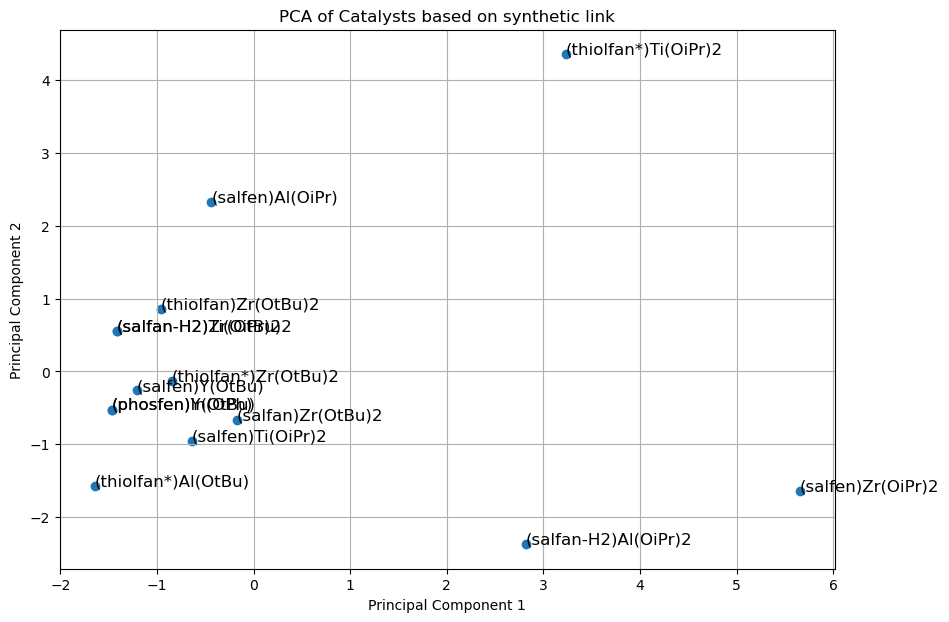

In [61]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(updated_adj_matrix_orthogonality.T)  # Transpose to have catalysts as features

# Step 2: Apply PCA
pca = PCA(n_components=2)  # We choose 2 components for visualization
principal_components = pca.fit_transform(scaled_data)

# Step 3: Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=df.columns)

# Step 4: Plot the PCA
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'])

# Annotate the points with catalyst names
for catalyst, (x, y) in pca_df.iterrows():
    plt.text(x, y, catalyst, fontsize=12)

plt.title('PCA of Catalysts based on synthetic link')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

plt.savefig("pca_catalysts_plot.png", dpi=500, bbox_inches='tight')  # Save as PNG with high resolution


plt.show()


In [36]:
# Identify similarity between each catalyst by correlation values. Translate it into another matrix table? Cat vs. cat
# Iterate through various descriptor combinations, identify descriptor combination that matches well with catalyst similarity table
# Use descriptor combination to generate catalyst space, including new catalyst designs. Identify clustering and generate predictions with/without community based measures.








In [37]:
#Import descriptor table for previously tested catalysts